In [1]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [2]:
import pickle
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline

import matplotlib.pyplot as plt

/Users/johnnosal/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import cross_val_score

/Users/johnnosal/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/johnnosal/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [4]:
# Suppress unnecessary warnings so that
# presentation looks clean
import warnings
warnings.filterwarnings('ignore')

In [5]:
with open('/Users/johnnosal/GA-DSI-working/week-08/8.2.2-lab-CARTs/code/starter-code/dataDiag2.pkl', 'r') as picklefile:
    data = pickle.load(picklefile)

In [6]:
data.head()

,patient_nbr,gender,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,...,rosiglitazone_Steady,rosiglitazone_Up,insulin_Down,insulin_No,insulin_Steady,insulin_Up,glyburide-metformin_Down,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up
0,91851201,1,0.954495,1.521311,-0.412243,1.256075,-0.036208,-0.030102,-0.223930,0.869955,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,89045397,0,0.212314,2.039730,-0.524282,0.564497,-0.085340,-0.030102,-0.111221,0.869955,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,112196934,0,-0.503360,-0.065745,-0.524282,-0.802386,-0.085340,-0.030102,-0.223930,-1.920516,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1288395,0,1.908727,0.897289,-0.076127,0.008523,-0.036208,-0.030102,0.226905,0.869955,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,42484482,1,-0.715412,-1.325790,-0.524282,-0.598981,-0.085340,-0.030102,-0.223930,-0.370254,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [7]:
data2 = data.ix[:, data.columns != 'patient_nbr']

In [8]:
X = data2.ix[:, data2.columns != 'readmitted']
y = data['readmitted']
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=data[['readmitted']].values)



In [9]:
#Convert to np array - XGB can't take Pandas
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [10]:
model = xgb.XGBClassifier(max_depth=4,min_child_weight=2, learning_rate=0.2)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.2, max_delta_step=0, max_depth=4,
       min_child_weight=2, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [11]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [12]:
from sklearn.metrics import accuracy_score
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 68.58%


In [13]:
PARAMETERS = {'max_depth':[3,5,7]}

In [34]:
cv_params = {'max_depth': [3,5,7], 'min_child_weight': [1,3,5]}
ind_params = {'learning_rate': 0.1, 'n_estimators': 100, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic'}
optimized_GBM = GridSearchCV(xgb.XGBClassifier(**ind_params), 
                            cv_params, 
                             scoring = 'accuracy', n_jobs = -1)

In [ ]:
optimized_GBM.fit(X_train, y_train)

In [ ]:
gbcgs = GridSearchCV(model, PARAMETERS, verbose=True, n_jobs=-1)
gbcgs.fit(X_train, y_train)

#After completion, show the final best results and scores
print gbcgs.best_estimator_
print gbcgs.best_score_

Fitting 3 folds for each of 3 candidates, totalling 9 fits


In [43]:
xxx = zip(model.feature_importances_,data2.columns)
sorted(xxx)

[(0.0, 'A1Cresult_Norm'),
 (0.0, 'admission_source_id_Emergency Room'),
 (0.0, 'admission_type_id_Emergency'),
 (0.0, 'admission_type_id_Urgent'),
 (0.0, 'diag_2_Diabetes'),
 (0.0, 'diag_2_Neoplasm'),
 (0.0, 'diag_3_Genitourinary'),
 (0.0, 'glimepiride_No'),
 (0.0, 'glyburide-metformin_No'),
 (0.0, 'glyburide-metformin_Steady'),
 (0.0, 'glyburide_Up'),
 (0.0, 'insulin_Up'),
 (0.0, 'medical_specialty_Neurology'),
 (0.0, 'medical_specialty_OB/GYN'),
 (0.0, 'medical_specialty_Pulmonology'),
 (0.0, 'metformin_Up'),
 (0.0, 'nateglinide_Down'),
 (0.0, 'nateglinide_No'),
 (0.0, 'pioglitazone_Steady'),
 (0.0, 'race_Hispanic'),
 (0.0, 'repaglinide_Down'),
 (0.0, 'repaglinide_Steady'),
 (0.0, 'repaglinide_Up'),
 (0.0, 'rosiglitazone_Steady'),
 (0.00075700227, 'diag_3_Neoplasm'),
 (0.00075700227, 'glipizide_No'),
 (0.00075700227, 'glyburide-metformin_Down'),
 (0.00075700227, 'max_glu_serum_>200'),
 (0.00075700227, 'medical_specialty_AllergyandImmunology'),
 (0.00075700227, 'medical_specialty_Canc

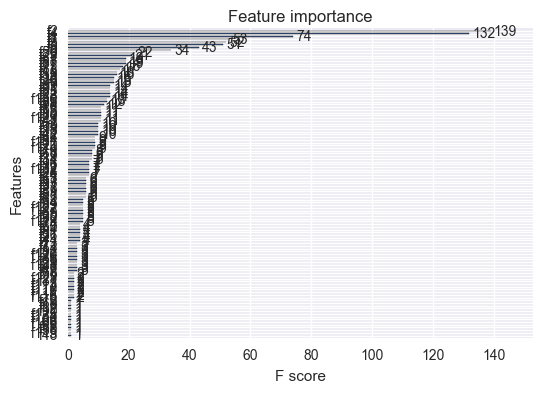

In [31]:
xgb.plot_importance(model)

In [46]:
from sklearn.feature_selection import SelectFromModel
thresholds = sorted(model.feature_importances_)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    # train model
    selection_model = XGBClassifier()
    selection_model.fit(select_X_train, y_train)
    # eval model
    select_X_test = selection.transform(X_test)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Thresh=0.000, n=137, Accuracy: 68.67%
Thresh=0.000, n=137, Accuracy: 68.67%
Thresh=0.000, n=137, Accuracy: 68.67%
Thresh=0.000, n=137, Accuracy: 68.67%
Thresh=0.000, n=137, Accuracy: 68.67%
Thresh=0.000, n=137, Accuracy: 68.67%
Thresh=0.000, n=137, Accuracy: 68.67%
Thresh=0.000, n=137, Accuracy: 68.67%
Thresh=0.000, n=137, Accuracy: 68.67%
Thresh=0.000, n=137, Accuracy: 68.67%
Thresh=0.000, n=137, Accuracy: 68.67%
Thresh=0.000, n=137, Accuracy: 68.67%
Thresh=0.000, n=137, Accuracy: 68.67%
Thresh=0.000, n=137, Accuracy: 68.67%
Thresh=0.000, n=137, Accuracy: 68.67%
Thresh=0.000, n=137, Accuracy: 68.67%
Thresh=0.000, n=137, Accuracy: 68.67%
Thresh=0.000, n=137, Accuracy: 68.67%
Thresh=0.000, n=137, Accuracy: 68.67%
Thresh=0.000, n=137, Accuracy: 68.67%
Thresh=0.000, n=137, Accuracy: 68.67%
Thresh=0.000, n=137, Accuracy: 68.67%
Thresh=0.000, n=137, Accuracy: 68.67%
Thresh=0.000, n=137, Accuracy: 68.67%
Thresh=0.001, n=113, Accuracy: 68.62%
Thresh=0.001, n=113, Accuracy: 68.62%
Thresh=0.001